# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [5]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
from uncertainties import unumpy

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

Absorption of gamma rays in a different medium (Cobalt 60)

In [12]:
#measurements from the Messung4 .csv files
# for bp only one measurement was made per plate, for al 2

bg = 36.24 /60
#pb values
pb = np.array([89, 98, 89, 74, 76])  * (1/60)
pb_c = pb - bg 
pb_clog = np.log(pb_c)
pb_ts = np.array([1.6, 1.6, 1.7, 1.75, 1.6])
pb_t = np.array([1.6, 1.6+1.6, 1.6+1.6+1.7, 1.6+1.6+1.7+1.75, 1.6+1.6+1.7+1.75+1.6])

#al values
al = 1/2 * np.array([(90+89), (99+89), (90+93), (89+89), (89+83)]) * (1/60)
al_c = al - bg
al_clog = np.log(al_c)
al_t = 1.6 * np.array([1, 2 ,3 ,4 ,5])

#errors
pb_e = np.sqrt(pb)
pb_c_e = np.sqrt(pb + bg)
pb_clog_e = pb_c_e / pb_c
pb_t_e = np.array([0.05, 0.1, 0.11, 0.12, 0.165])

al_e = np.sqrt(al)
al_c_e = np.sqrt(al + bg)
al_clog_e = al_c_e / al_c
al_t_e = np.array([0.05, 0.1, 0.15, 0.2, 0.25])


#linear fit pb
def linfunc(x,a, b):
    y = a*x + b
    return y

OptVal1, CovarianceMatrix1 = sp.optimize.curve_fit(linfunc, pb_t,pb_clog, sigma = pb_clog_e)
k = OptVal1[0]
j = OptVal1[1]
kj_err = np.sqrt(abs(CovarianceMatrix1[0]))
print('fit pb result:', k,j, kj_err)

#calculate R^2 for pf fit
res_pb = pb_clog - linfunc(pb_t, k, j)
ss_res_pb = np.sum(res_pb**2)
ss_tot_pb = np.sum((pb_clog-np.mean(pb_clog))**2)
r2_pb = 1 - (ss_res_pb / ss_tot_pb)
print('R^2 pb:', r2_pb)

#linear fit al
def linfunc(x,a, b):
    y = a*x + b
    return y

OptVal2, CovarianceMatrix2 = sp.optimize.curve_fit(linfunc, al_t,al_clog, sigma = al_clog_e)
o = OptVal2[0]
u = OptVal2[1]
ou_err = np.sqrt(abs(CovarianceMatrix1[0]))
print('fit al result:', o,u, ou_err)

#calculate R^2 for al fit
res_al = al_clog - linfunc(al_t, o, u)
ss_res_al = np.sum(res_al**2)
ss_tot_al = np.sum((al_clog-np.mean(al_clog))**2)
r2_al = 1 - (ss_res_al/ ss_tot_al)
print('R^2 al:', r2_al)

#calculate absorption coefficients
hd_pb = np.log(2)/ufloat(abs(k),kj_err[0])
hd_al = np.log(2)/ufloat(abs(o),ou_err[0])

print('Halbwertsdicken [mm]')
print('pb:', hd_pb)
print('al:', hd_al)



fit pb result: -0.061658970706014476 0.10314179465617929 [0.0290179 0.0607374]
R^2 pb: 0.6431246285982506
fit al result: -0.014142695650790587 -0.04087362117007031 [0.0290179 0.0607374]
R^2 al: 0.4143204611763519
Halbwertsdicken
pb: 11+/-5
al: (0.5+/-1.0)e+02


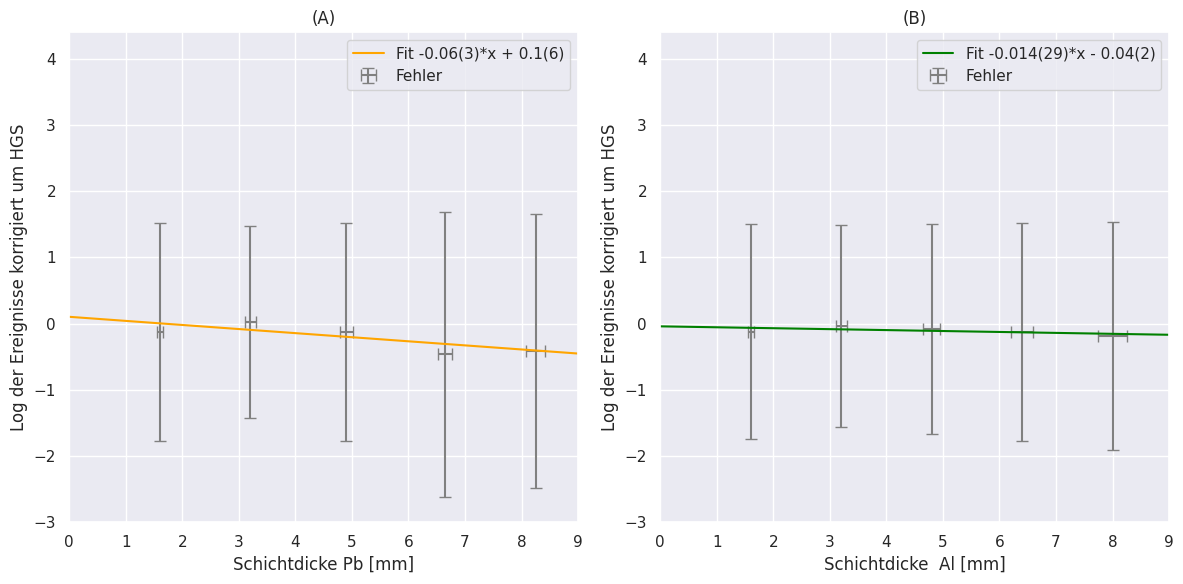

In [14]:
#matplotlib plot

fig, axs=plt.subplots(1, 2, figsize=(12, 6)) #defining figure object
#sns.set_theme(style="darkgrid")
axs[0].errorbar(pb_t, pb_clog, xerr = pb_t_e,  yerr = pb_clog_e ,linestyle='none',capsize = 4, label = 'Fehler', color = 'grey')
axs[0].plot(np.arange(0,10), linfunc(np.arange(0,10), k, j), label = 'Fit -0.06(3)*x + 0.1(6)', color = 'orange')
axs[0].set_xlabel('Schichtdicke Pb [mm]')
axs[0].set_ylabel('Log der Ereignisse korrigiert um HGS')
axs[0].set_title('(A)')
axs[0].set_xlim((0,9)) 
axs[0].set_ylim((-3,4.4)) # -2,2
axs[0].legend()
axs[1].errorbar(al_t, al_clog, xerr = al_t_e,  yerr = al_clog_e ,linestyle='none',capsize = 4, label = 'Fehler', color = 'grey')
axs[1].plot(np.arange(0,10), linfunc(np.arange(0,10), o, u), label = 'Fit -0.014(29)*x - 0.04(2)', color = 'green')
axs[1].set_xlabel('Schichtdicke  Al [mm]')
axs[1].set_ylabel('Log der Ereignisse korrigiert um HGS')
axs[1].set_title('(B)')
axs[1].set_xlim((0,9))
axs[1].set_ylim((-3,4.4))
axs[1].legend()
fig.tight_layout()
plt.show()